# Progetto PAA
#### Autore:  Federico Schipani - 6185896 - <a href="mailto:federico.schipani@stud.unifi.it">federico.schipani@stud.unifi.it</a>

##### Descrizione del progetto:
In questo notebook verranno effettuate verifiche numeriche su somme infinite dei reciproci dei numeri di Tribonacci. L'articolo da cui è stato preso spunto per questo progetto è <a href = "https://cs.uwaterloo.ca/journals/JIS/VOL19/Kuhapatanakul/kuha7.pdf">Reciprocal Sums of the Tribonacci Numbers</a>.

### Preparazione:
Per prima cosa è necessario importare tutti i pacchetti necessari allo svolgimento di questo progetto:

In [2]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
from functools import lru_cache
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib
#sys.setrecursionlimit(10000000)

Le seguenti istruzioni sono necessarie per ottenere risultati più appaganti dal punto di vista visivo:

In [3]:
init_printing()
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>
""")

### Introduzione:

I numeri di Fibonacci sono definiti dalla seguente relazione di ricorrenza:

In [4]:
F = Function('F')
n = symbols('n',integer=True)
f = F(n+1)-F(n)-F(n-1)
closedFib = simplify(rsolve(f, F(n), {F(0):0, F(1):1}))
closedFibEq = Eq(F(n), closedFib)
closedFibEq

In [5]:
closedFib1 = Lambda([n], closedFib)
[(n, simplify(fibonacci(n)-closedFib1(n).doit())) for n in range(0,11)]

Definiamo una funzione per il calcolo dei numeri di Tribonacci nel seguente modo:

In [6]:
initial_positive_conditions = {0:0, 1:1, 2:1}


def makePositiveTribonacci(maxsize = None):
    @lru_cache(maxsize)
    def calcPositiveTribonacci(n):
        return calcPositiveTribonacci(n-1)  + calcPositiveTribonacci(n-2) + calcPositiveTribonacci(n-3) if n not in initial_positive_conditions else initial_positive_conditions[n]
    return calcPositiveTribonacci

positiveTribonacci = makePositiveTribonacci(None)
PT = implemented_function(Function('T'), positiveTribonacci)


Per verificare che la funzione calcola effettivamente i numeri di Tribonacci si esegue una verifica numerica:

In [7]:
lambda_tribonacci = lambdify(n, PT(n))
[(n, lambda_tribonacci(n)) for n in range (0,11)]

Ohtsuka e Nakamura hanno derivato alcune formule per somme infinite dei reciproci dei numeri di Fibonacci:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{F_k } \right)^{-1}\right\rfloor = F_{n-2}\ se\ n\ è\ pari\ e\ n \geq 2,\ F_{n-2}-1\ se\ n\ è\ dispari\ e\ n \geq 1 $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{(-1)^k}{F_k}\right)^{-1}\right\rfloor = (-1)^n F_{n+1}-1\ con\ (n>1) $$
$$\left\lfloor\left(\sum_{k=n}^{\infty}  \frac{1}{\sum_{i = 1}^{k} F_i}\right)^{-1}\right\rfloor = F_n -1\ con \ (n \geq 3) $$
In questo notebook verranno verificate formule simili, ma con i numeri di Tribonacci.

### Svolgimento:

La sequenza di numeri di Tribonacci può essere estesa per valori negativi di n, usando la definizione e le condizioni iniziali.
$$F_n = F_{n-1}+F_{n-2}+F_{n-3}$$
Effettuando uno shift di tre posizioni, e cambiando il segno si ottiene:
$$F_{n} = F_{n-3}-F_{n+2}-F_{n+1}$$


In [8]:
initial_negative_conditions = {0:0, -1:0, -2:1}
def makeNegativeTribonacci(maxsize=None):
    @lru_cache(maxsize=maxsize)
    def calcNegativeTribonacci(n):
        return calcNegativeTribonacci(n+3)  - calcNegativeTribonacci(n+2) - calcNegativeTribonacci(n+1) if n not in initial_negative_conditions else initial_negative_conditions[n]
    return calcNegativeTribonacci
negativeTribonacci = makeNegativeTribonacci(maxsize = None)
NT = implemented_function(Function('NT'), negativeTribonacci)
lambda_negative_tribonacci = lambdify(n, NT(n))
[(n*-1, lambda_negative_tribonacci(n*-1)) for n in range (0,11)]

Per comodità definiamo una funzione di Tribonacci unica, sia per i numeri negativi che positivi:

In [9]:
def tribonacci(n):
    if n>=0:
        return positiveTribonacci(n)
    elif n<0:
        return negativeTribonacci(n)
T = implemented_function(Function('T'), tribonacci)
lambda_tribonacci = lambdify(n, T(n))
[(n, T(n).evalf()) for n in range(-40, 40)]
#SWAG EFFICIENZA

Prima di dimostrare la veridicità delle tre uguaglianze descritte nell'introduzione vengono forniti 3 lemmi.
###### Lemma 1: 
Sia $n$ un intero positivo, allora:
1. $T^{2}_{n} - T_{n-1} T_{n+1} = T_{-(n+1)}$
2. $\sum_{i=1}^{n} T_i = (T_{n+2}+T_{n}-1)/2$ 
3. $T_{n} > T_{-(n+3)} \text{ con } n \geq 3$ 


Effettuiamo una verifica numerica della prima uguaglianza:

In [10]:
lem1_expr1 = T(n)**2 - T(n-1)*T(n+1)
lem1_expr2 = T(-(n+1))
calc_lem1_expr1 = Lambda([n], simplify(lem1_expr1))
calc_lem1_expr2 = Lambda([n], simplify(lem1_expr2))
[(calc_lem1_expr1(n).evalf(chop=True)-calc_lem1_expr2(n).evalf(chop=True)) for n in range(0,40)]

Effettuiamo una verifica numerica della seconda uguaglianza:

In [11]:
lem1_expr4 = (T(n+2)+T(n)-1)/2
i = symbols('i', integer=True)
lem1_expr3 = Sum(T(i), (i, 1, n))
calc_lem1_expr4 = Lambda([n], simplify(lem1_expr4))
calc_lem1_expr3 = Lambda([n], simplify(lem1_expr3))
[(calc_lem1_expr4(n).evalf(chop=True)-calc_lem1_expr3(n).doit().evalf(chop=True)) for n in range(0,40)]

Effettuiamo una verifica numerica del terzo risultato, che ricordiamo valere solo per $n \geq 3$:

In [12]:
[(n, T(n).doit()>T(-(n+3)).doit()) for n in range(3, 1000, 10)]

###### Lemma 2: 
Sia $n > 1$ un intero positivo, allora:
1. $\frac{1}{T_n - T_{n-1} + 1} < \sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1} $
2. $\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$

Per prima cosa si verifica:
$$\frac{1}{T_n - T_{n-1}+1} < \sum_{k=n}^{\infty} \frac{1}{T_k} $$


In [13]:
lem2_expr1 = 1/(T(n)-T(n-1)+1)
k = symbols('k', integer=True)
lem2_expr2 = Sum(1/T(k), (k, n, oo))
calc_lem2_expr2 = Lambda([n], lem2_expr2)
calc_lem2_expr1 = Lambda([n], lem2_expr1)
[(n, calc_lem2_expr1(n).evalf() < calc_lem2_expr2(n).doit().evalf()) for n in range(2, 60)]

Per via del termine $\sum^{\infty}_{k=n} \frac{1}{T_k}$ non si riesce ad eseguire una verifica numerica soddisfacente, un tentativo per risolvere questo problema potrebbe essere operare con numeri interi manipolando l'espressione. La sommatoria:
$$\sum^{\infty}_{k=n} \frac{1}{T_k}$$
Si può riscrivere, fissando un limite superiore $N$, come:
$$\frac{\prod_{k=n, k \neq n}^{N} T_k + \cdots + \prod_{k=n, k \neq N}^{N} T_k }{\prod_{k=n}^{N} T_k}$$
La disugualianza precedente risulterà quindi:
$$\left(\frac{\prod_{k=n}^{N} T_k}{T_n}  + \cdots + \frac{\prod_{k=n}^{N} T_k}{T_N}\right)(T_n-T_{n-1}+1) \geq \prod_{k=n}^{N} T_k$$
Per velocizzare il calcolo si esegue dal fallimento del precedente in poi:

In [14]:
limit = 100
q = Product(T(k), (k,n,limit))
p = Sum(q/T(k), (k,n,limit))
t = T(n)-T(n-1)+1
calc_t = Lambda([n], t.doit())
calc_p = Lambda([n], p.doit())
calc_q = Lambda([n], q.doit())
[(i, (((calc_p(i).evalf()*calc_t(i).evalf())>=calc_q(i).evalf()))) for i in range(36,70)]

Infine per verificare il primo  risultato basta verificare la seconda parte della disuguaglianza:
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}$$

In [15]:
lem2_expr3 = 1/(T(n)-T(n-1)-1)
calc_lem2_expr3 = Lambda([n], lem2_expr3)
[(n, calc_lem2_expr2(n).doit().evalf() < calc_lem2_expr3(n).evalf()) for n in range(2,60)]

Nella verifica del secondo risultato si segue lo stesso approccio:
$$\frac{1}{(-1)^n(T_n+T_{n-1})+1} < \sum_{k=n}^{\infty} \frac{(-1)^k}{T_k}$$
E poi 
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$$

In [16]:
lem2_expr4 = 1/(((-1)**n) * (T(n)+T(n-1))+1)
lem2_expr5 =  Sum(((-1)**k)/T(k), (k, n, oo))
calc_lem2_expr5 = Lambda([n], lem2_expr5)
calc_lem2_expr4 = Lambda([n], lem2_expr4)
[(n, calc_lem2_expr4(n).evalf() < calc_lem2_expr5(n).doit().evalf()) for n in range(2, 60)]

In [17]:
lem2_expr6 = 1/(((-1)**n) * (T(n)+T(n-1))-1)
calc_lem2_expr6 = Lambda([n], lem2_expr6)
[(n, calc_lem2_expr6(n).evalf() > calc_lem2_expr5(n).doit().evalf()) for n in range(2, 60)]

Dal 35-esimo indice in poi la seconda diseguaglianza ha gli stessi problemi di precisione della precedente, seguiamo quindi un approccio molto simile. Fissiamo quindi un limite superiore alla sommatoria infinita:
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} \rightarrow \sum_{k=n}^{N} \frac{(-1)^k}{T_k} $$ 
Ed effettuiamo una semplice trasformazione:
$$\frac{\sum_{k=n}^{N}( (-1)^{k} \prod_{w=n, w\neq k}^{N} T_w)}{\prod_{k = n}^{N} T_k}$$
Verifichiamo quindi:
$$\left(\sum_{k=n}^{N}\left( (-1)^{k} \prod_{w=n, w\neq k}^{N} T_w\right)\right) ((-1)^n(T_n+T_{n-1})-1) >\prod_{k = n}^{N} T_k $$
Nel caso in cui $n$ è pari, visto che c'è un cambiamento di segno bisogna verificare la diseguaglianza con segno opposto:
$$\left(\sum_{k=n}^{N}\left( (-1)^{k} \prod_{w=n, w\neq k}^{N} T_w\right)\right) ((-1)^n(T_n+T_{n-1})-1) < \prod_{k = n}^{N} T_k $$

In [90]:
limit = 60
calc_lem2_expr6_2 = Lambda([n], sympify( (((-1)**n) * (T(n)+T(n-1))-1), rational = True))
q = Product(T(k), (k,n,limit))
p = Sum(q/T(k), (k,n,limit))
calc_p = Lambda([n], sympify(p, rational=True))
calc_q = Lambda([n], sympify(q, rational=True))
[(n, Rational(calc_p(n).evalf())*Integer(calc_lem2_expr6_2(n).evalf()) > Integer(calc_q(n).evalf())) for n in range(35, 60, 2)]

In [92]:
[(n, Rational(calc_p(n).evalf())*Integer(calc_lem2_expr6_2(n).evalf()) < Integer(calc_q(n).evalf())) for n in range(36, 60, 2)]

In questo caso, attraverso la manipolazione dell'espressione, non si riesce ad ottenere risultati soddisfacenti, prendiamo quindi un singolo caso e mostriamo un grafico che mostra l'andamento della parte sinistra della disequazione al variare di $N$:
$$\sum_{k=n}^{N} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})-1}$$

<IPython.core.display.Javascript object>


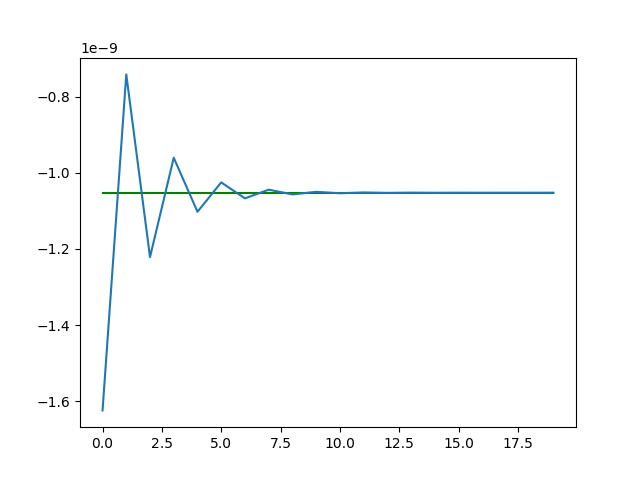

In [87]:
%matplotlib notebook
test_case = 35
limit = 20
N = symbols('N', integer = True)
lem2_expr5_bis =  Sum(((-1)**k)/T(k), (k, n, N))
calc_lem2_expr5_bis = Lambda([n, N], lem2_expr5_bis)
plt.plot([calc_lem2_expr6(test_case).evalf()]*limit, 'g')
plt.plot([calc_lem2_expr5_bis(test_case, test_case+N) for N in range(0, limit)])
plt.show()

La linea blu del grafico mostra la parte sinistra della disequazione al variare di $N$. Come si può notare ha un andamento oscillatorio attorno al valore destro della disugualianza. Per valori sempre più grandi di $N$ si nota anche un'aumento del periodo di oscillazione. 
Anche con questo tipo di verifica però non si ottengono risultati significativi per mostrare che vale sempre quell'uguaglianza. Possiamo attribuire questo fallimento alla precisione di macchina. 

Proviamo ora un ultimo approccio, si implementa la disequazione come una funzione Python che opera esclusivamente su interi, di conseguenza bisogna sfruttare questa forma per $n$ dispari:
$$\left(\sum_{k=n}^{N}\left( (-1)^{k} \prod_{w=n, w\neq k}^{N} T_w\right)\right) ((-1)^n(T_n+T_{n-1})-1) > \prod_{k = n}^{N} T_k $$
o questa per $n$ pari:
$$\left(\sum_{k=n}^{N}\left( (-1)^{k} \prod_{w=n, w\neq k}^{N} T_w\right)\right) ((-1)^n(T_n+T_{n-1})-1) < \prod_{k = n}^{N} T_k $$

In [78]:
def test_sx_lem2(n, N):
    result = 0
    for k in range(n, N):
        internal_result = 1
        for w in range(n, N):
            if w!=k:
                internal_result = internal_result * lambda_tribonacci(w)
        internal_result = internal_result*((-1)**k)
        result = result+internal_result
    result = result * ( ((-1)**n) * (lambda_tribonacci(n)+lambda_tribonacci(n-1)) - 1 )
    return result

def test_dx_lem2(n, N):
    result = 1
    for k in range(n, N):
        result = result * lambda_tribonacci(k)
    return result
(type(test_integer_lem2(35, 35+20)), type(test2_integer_lem2(35, 35+20)))

(int, int)

Come possiamo vedere entrambe le funzioni restituiscono un numero intero, quindi per le caratteristiche di Python in questo modo abbiamo precisione pressoché infinita. Riproviamo ora a plottare un grafico per vedere se si riescono ad ottenere i risultati sperati.

In [129]:
test_case = 38
limit = 40
(test_sx_lem2(test_case, test_case+limit) < test_dx_lem2(test_case, test_case+limit), test_sx_lem2(test_case, test_case+limit) - test_dx_lem2(test_case, test_case+limit) )

(True,
 -11199535644561084295696775356986932796409087950362126730084233205395854678496265347832523473346920756394654261447476641900259196627145491750555545111397522407380286424097802848318693527928458909924960042558918831837202406026189061307517955565879227094198837629558590107763341307645880867131291243339777225514017702326213334934649603742809292563264419593055790814081146427823078658216179389996518489242278357854293087625472688127521807228476625028730249203760896418966403694603283638788695805852838814674916592600796259680905933340422452686026844962641619704926319250977587200000000)

<IPython.core.display.Javascript object>


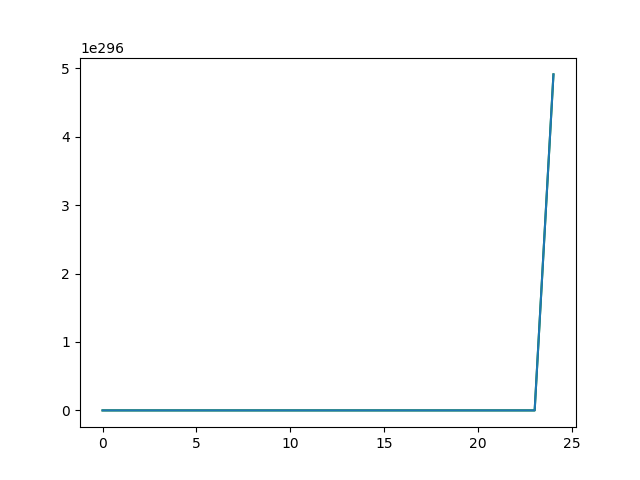

(True,
 556853240186846685114885621150738381018275729252285301405234929855367551432780037645312625828322506681025615419139794420264552935684120122109576950793441352852692861692491886572878545182004675155479861370972563790241452000406823616500214802416615048395992876610519921214296406068160946632213099708416000000)

In [124]:
%matplotlib notebook
test_case = 37
limit = 25
plt.plot([test_dx_lem2(test_case, test_case+N) for N in range(0, limit)], 'g')
plt.plot([test_sx_lem2(test_case, test_case+N) for N in range(0, limit)])
plt.show()
(test_sx_lem2(test_case, test_case+limit) > test_dx_lem2(test_case, test_case+limit), test_sx_lem2(test_case, test_case+limit) - test_dx_lem2(test_case, test_case+limit))

Mostriamo anche un grafico che mostra l'andamento della differenza tra il termine destro e il termine sinistro al variare del limite superiore $N$:

<IPython.core.display.Javascript object>


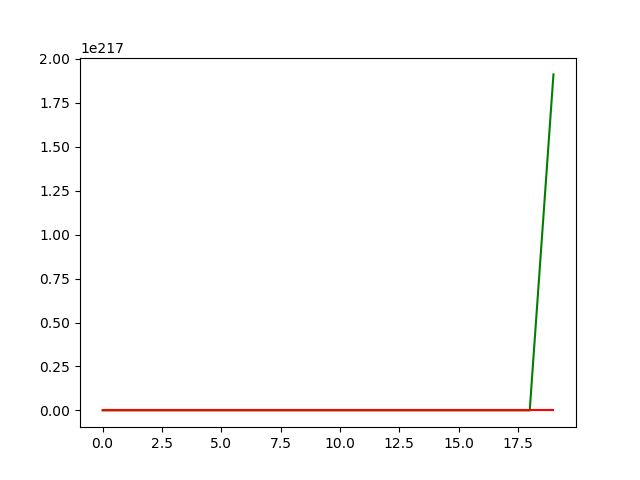

In [146]:
%matplotlib notebook
test_case = 37
limit = 20
plt.plot([test_sx_lem2(test_case, N) - test_dx_lem2(test_case, N) for N in range(test_case, test_case+limit)], 'g')
plt.plot([0]*(limit), 'r')
plt.show()

###### Lemma 3: 
Sia $n>2$ un intero positivo, allora:
1. Se $T_{-(n+1)} < 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$
2. Se $T_{-(n+1)} > 0$, allora $\sum_{k=n}^{\infty} \frac{1}{T_k} > \frac{1}{T_n - T_{n-1}}$

Per verificare i risultati di questo lemma si possono effettuare verifiche numeriche:

Per il primo caso si ha:
Se $T_{-(n+1)} < 0$, allora 
$$\sum_{k=n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}$$



Effettuiamo una verifica numerica, per ovvi motivi non si può effettuare una sommatoria di numeri infiniti, quindi ci limiteremo a fissare un limite superiore abbastanza grande.

In [21]:
k = symbols('k', integer=True)
calc_lem3_expr6 = Lambda([n], Sum(1/T(k), (k,n,oo)))
calc_lem3_expr7 = Lambda([n], 1/(T(n)-T(n-1)))
[(n, calc_lem3_expr6(n).doit().evalf() < calc_lem3_expr7(n).evalf() ) for n in range(3,60) if lambda_tribonacci(-(n+1))<0]

Si può ora effettuare una verifica del secondo risultato di questo lemma.
Se $T_{-(n+1)} > 0$, allora $$\sum_{k=n}^{\infty} \frac{1}{T_k} > \frac{1}{T_n - T_{n-1}}$$
 


In [22]:
[(n, calc_lem3_expr6(n).doit().evalf() > calc_lem3_expr7(n).evalf() ) for n in range(3,60) if lambda_tribonacci(-(n+1))>0]

Probabilmente per motivi legati alla precisione di macchina per alcuni valori il risultato non è verificato, prendiamo per esempio il caso in cui $n = 44$ e facciamo vedere che sottraendo la sommatoria all'espressione la differenza diminuisce sempre di più. 

In [23]:
w = symbols('w', integer=True)
calc_lem3_expr8 = Lambda([w], Sum(1/T(k), (k,44,w)))
[( calc_lem3_expr7(44).evalf() - calc_lem3_expr8(w).doit().evalf() ) for w in range(0, 200, 10)]

Ora siamo pronti per dimostrare le uguaglianze descritte nell'introduzione.
###### Teorema 4:
Sia $n$ un numero intero positivo. Allora:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{T_k } \right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ T_{-(n+1)} < 0 \\
T_n - T_{n-1} -1\ \text{se}\ T_{-(n+1)} > 0
\end{cases}
$$
Dimostrazione:
Se $n=1$, allora $T_{-2} = 1 > 0$ e $$\sum_{k = 1}^{\infty} \frac{1}{T_k} > \frac{1}{T_1} = 1$$
Effettuiamo una verifica numerica di questo risultato:

In [24]:
k = symbols('k', integer=True)
teo4_expr1 = Sum(1/T(k), (k,1,oo))
teo4_expr1.doit().evalf()


Possiamo dire che $$0<\left(\sum_{k = 1}^{\infty} \frac{1}{T_k}\right)^{-1} < 1$$
Prendendo la parte intera inferiore di questo numero ottengo:
$$\left\lfloor \left(\sum_{k = 1}^{\infty} \frac{1}{T_k}\right)^{-1} \right\rfloor = 0 = T_1 - T_0 -1$$
Effettuiamo una verifica numerica di questo risultato:

In [25]:
teo4_expr2 = teo4_expr1**(-1)
[(math.floor(teo4_expr2.doit().evalf()) == ( T(1).evalf() - T(0).evalf() -1))]

[True]

La prova per $n=2$ è analoga. In questo caso ho $T_{-3} = -1$, quindi si rientra nel primo caso.
$$\left(\sum_{k = 2}^{\infty} \frac{1}{T_k}\right) > \frac{1}{T_2} = 1$$
$$0 <\left(\sum_{k = 2}^{\infty} \frac{1}{T_k}\right)^{-1}  < 1$$
$$\left\lfloor \left(\sum_{k = 2}^{\infty} \frac{1}{T_k}\right)^{-1} \right\rfloor = 0 = T_2 - T_1$$
Effettuiamo una verifica numerica di questo risultato:

In [26]:
teo4_expr3 = Sum(1/T(k), (k,2,oo))
teo4_expr3.doit().evalf() > T(2).evalf()

In [27]:
teo4_expr4 = Sum(1/T(k), (k,2,oo))**(-1)
math.floor(teo4_expr4.doit().evalf()) == T(2).evalf() - T(1).evalf()

True

Dimostriamo ora per il caso generico in cui $n>2$. Usando il Lemma 2 ed il Lemma 3 si ottiene:
$$\frac{1}{T_n - T_{n-1} + 1} < \sum_{k =n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1}}\ \text{se}\ T_{-(n+1)} < 0$$
Oppure:
$$\frac{1}{T_n - T_{n-1}} < \sum_{k =n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}\ \text{se}\ T_{-(n+1)} > 0$$
Allora si ottiene il risultato finale:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{T_k } \right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ T_{-(n+1)} < 0 \\
T_n - T_{n-1} -1\ \text{se}\ T_{-(n+1)} > 0
\end{cases}
$$
Verifichiamo numericamente tutte e 3 le espressioni:

Iniziamo dal caso in cui $T_{-(n+1)}<0$

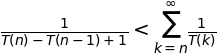

In [28]:
calc_teo4_expr5 = Lambda([n], Sum(1/T(k), (k,n,oo)))
calc_teo4_expr6 = Lambda([n], 1/(T(n)-T(n-1)+1))
1/(T(n)-T(n-1)+1) < Sum(1/T(k), (k,n,oo))


In [29]:
[(n, calc_teo4_expr6(n).evalf() < calc_teo4_expr5(n).doit().evalf()) for n in range(0, 50) if T(-(n+1)).evalf() < 0]

Anche in questo caso plottiamo un grafico che mostra l'andamento della parte destra della disequazione. Per prima cosa si fissa un limite superiore $N$ alla sommatoria:
$$\sum_{k =n}^{N} \frac{1}{T_k}$$
E facendolo variare si analizza l'andamento

<IPython.core.display.Javascript object>


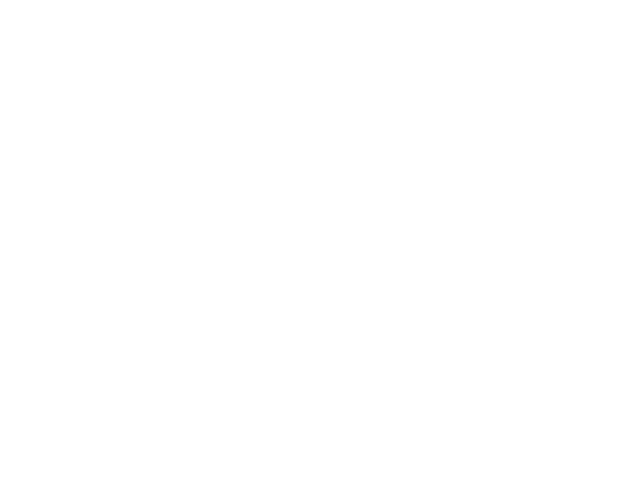

In [30]:
%matplotlib notebook
test_case = 48
limit =50
N = symbols('N', integer = True)
calc_teo4_expr5_bis = Lambda([n, N], Sum(1/T(k), (k,n,N)))
plt.plot([calc_teo4_expr6(test_case).evalf()]*limit, 'g')
plt.plot([calc_teo4_expr5_bis(test_case, test_case+N).evalf() for N in range(0, limit)])
plt.show()

Anche in questo caso otteniamo un andamento tendente al risultato sperato, senza però vedere mai che la funzione plottata in blu supera quella plottata in verde.

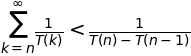

In [31]:
calc_teo4_expr7 = Lambda([n], 1/(T(n)-T(n-1)))
Sum(1/T(k), (k,n,oo)) < 1/(T(n)-T(n-1))


In [32]:
[(n, calc_teo4_expr5(n).evalf() < calc_teo4_expr7(n).doit().evalf()) for n in range(0, 50) if T(-(n+1)).evalf() < 0]

Verifichiamo ora la prima delle due:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{T_k } \right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ T_{-(n+1)} < 0 \\
T_n - T_{n-1} -1\ \text{se}\ T_{-(n+1)} > 0
\end{cases}
$$

In [33]:
calc_teo4_expr8 = Lambda([n], ((Sum(1/T(k), (k,n,oo))**(-1))))
[((T(n).evalf()-T(n-1).evalf()) == math.floor(calc_teo4_expr8(n).evalf())) for n in range(0, 40) if T(-(n+1)).evalf() < 0]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

Proviamo ora il caso in cui $T_{-(n+1)}>0$.
$$\frac{1}{T_n - T_{n-1}} < \sum_{k =n}^{\infty} \frac{1}{T_k} < \frac{1}{T_n - T_{n-1} - 1}\ \text{se}\ T_{-(n+1)} > 0$$

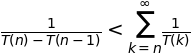

In [34]:
 1/(T(n)-T(n-1)) < Sum(1/T(k), (k,n,oo))

In [35]:
[(n, calc_teo4_expr7(n).evalf() < calc_teo4_expr5(n).doit().evalf()) for n in range(0, 50)  if T(-(n+1)).evalf() > 0]

Anche in questo caso possiamo mostrare un grafico per l'andamento della funzione:

<IPython.core.display.Javascript object>


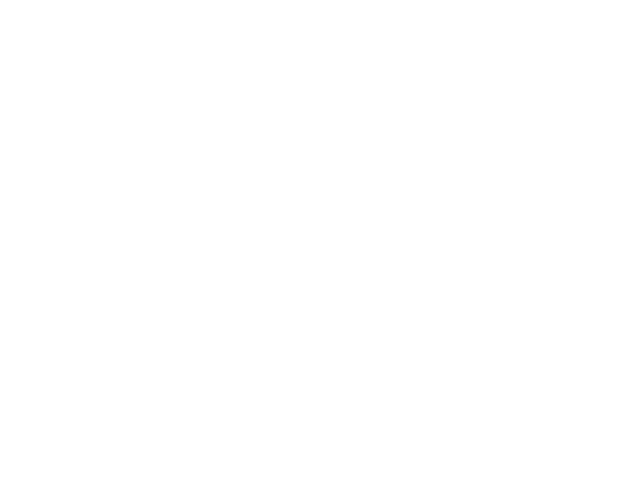

In [36]:
%matplotlib notebook
test_case = 32
limit =50
N = symbols('N', integer = True)
plt.plot([calc_teo4_expr7(test_case).evalf()]*limit, 'g')
plt.plot([calc_teo4_expr5_bis(test_case, test_case+N).evalf() for N in range(0, limit)])
plt.show()

Da cui si ricavano i medesimi risultati del precedente grafico. Proseguiamo con le verifiche.

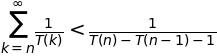

In [37]:
Sum(1/T(k), (k,n,oo)) < 1/(T(n)-T(n-1)-1)

In [38]:
calc_teo3_expr9 = Lambda([n], 1/(T(n)-T(n-1)-1))
[(n, calc_teo4_expr5(n).doit().evalf() < calc_teo3_expr9(n).evalf()) for n in range(0, 50)  if T(-(n+1)).evalf() > 0]

Verifichiamo ora la seconda uguaglianza:
$$\left\lfloor \left( \sum_{k=n}^{\infty}  \frac{1}{T_k } \right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ T_{-(n+1)} < 0 \\
T_n - T_{n-1} -1\ \text{se}\ T_{-(n+1)} > 0
\end{cases}
$$

In [39]:
[( (T(n).evalf()-T(n-1).evalf() - 1) == math.floor(calc_teo4_expr8(n).evalf()) ) for n in range(0, 30) if T(-(n+1)).evalf() > 0]


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

Il Teorema 4 appena descritto non vale nel caso in cui $T_{-(n+1)} = 0$, questo si verifica per esempio quando $n=3$. 
Visto che: $$\sum_{k=3}^{\infty} \frac{1}{T_k} > \sum_{k=1}^{\infty} \frac{1}{2^k} = 1$$
Abbiamo:
$$\left\lfloor\left(\sum_{k=3}^{\infty} \frac{1}{T_k}\right)^{-1}\right\rfloor = 0$$
Proviamo numericamente le due identità mostrate:

In [40]:
(calc_teo4_expr5(3).evalf(), Sum(1/(2**k), (k, 1, oo)).doit().evalf())

In [41]:
math.floor(((calc_teo4_expr5(3).doit().evalf())**(-1)))

Si può osservare che per $1 \leq n \leq 19$ se $ 3|n $, allora il valore di $T_{-n}$ è negativo. Quindi abbiamo il seguente corollario:
###### Corollario 5:
Sia $n < 19$ un intero positivo, con $n \neq 16$. Allora:
$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{1}{T_k}\right)^{-1}\right\rfloor = 
\begin{cases}
T_n - T_{n-1}\ \text{se}\ 3|(n+1) \\
T_n - T_{n-1} -1\ \text{se}\ \neg (3|(n+1))
\end{cases}$$
Effettuiamo una verifica numerica in entrambi i casi:

In [42]:
[(n, math.floor((calc_teo4_expr5(n)**(-1)).doit().evalf()) == T(n).evalf()-T(n-1).evalf()) for n in range(0,19) if (n+1)%3==0]


[(2, True), (5, True), (8, True), (11, True), (14, True), (17, True)]

In [43]:
[(n, math.floor((calc_teo4_expr5(n)**(-1)).doit().evalf()) == T(n).evalf()-T(n-1).evalf()-1) for n in range(1,19) if (n+1)%3!=0]


[(1, True),
 (3, True),
 (4, True),
 (6, True),
 (7, True),
 (9, True),
 (10, True),
 (12, True),
 (13, True),
 (15, True),
 (16, False),
 (18, True)]

Come si può notare l'uguaglianza vale per tutti i casi tranne che per $n=16$.

###### Teorema 6:
Sia $n>1$ un intero positivo, allora:

$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{(-1)^k)}{T_k}\right)^{-1}\right\rfloor = 
\begin{cases}
(-1)^n (T_n + T_{n-1})\ \text{se}\ (-1)^n T_{-(n+1)} > 0 \\
(-1)^n (T_n + T_{n-1} -1)\ \text{se}\ (-1)^n T_{-(n+1)} < 0
\end{cases}$$

Dimostrazione:

Osserviamo che
$$\frac{1}{(-1)^{n}(T_n+T_{n-1})} - \frac{(-1)^n}{T_n} - \frac{1}{(-1)^{n+1}(T_{n+1}+T_{n})} = 
\frac{(-1)^{n}T_{-(n+1)}}{T_{n}(T_{n}+T_{n-1})(T_{n+1}+T_{n})}$$
Effettuiamo una prova numerica di questa uguaglianza:

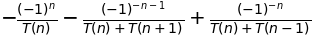

In [44]:
teo6_expr1 = 1/(((-1)**n)*(T(n)+T(n-1))) - ((-1)**n)/T(n) - (1/((-1)**(n+1)*(T(n+1)+T(n))))
teo6_expr1

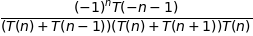

In [45]:
teo6_expr2 = ((-1)**n * T(-(n+1)))/(T(n)*(T(n)+T(n-1))*(T(n+1)+T(n)))
teo6_expr2

In [46]:
calc_teo6_expr1 = Lambda([n], teo6_expr1)
calc_teo6_expr2 = Lambda([n], teo6_expr2)
[(calc_teo6_expr1(n).evalf(chop=True) - calc_teo6_expr2(n).evalf(chop=True)) for n in range(2, 40)]

Ora dividiamo i due casi, il primo in cui $(-1)^nT_{-(n+1)} > 0$, ed il secondo in cui $(-1)^nT_{-(n+1)} < 0$.

Se $(-1)^nT_{-(n+1)} > 0$:

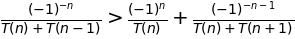

In [47]:
teo6_expr3 = 1/((-1)**(n)*(T(n)+T(n-1)))
teo6_expr4 = ((-1)**n)/T(n) + 1/((-1)**(n+1)*(T(n+1)+T(n)))
teo6_expr3 > teo6_expr4

In [48]:
calc_teo6_expr3 = Lambda([n], teo6_expr3)
calc_teo6_expr4 = Lambda([n], teo6_expr4)
[(n, calc_teo6_expr3(n).evalf() > calc_teo6_expr4(n).evalf()) for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()>0]

Anche in questo caso la verifica numerica non porta ai risultati sperati, quindi mostriamo un grafico:

<IPython.core.display.Javascript object>


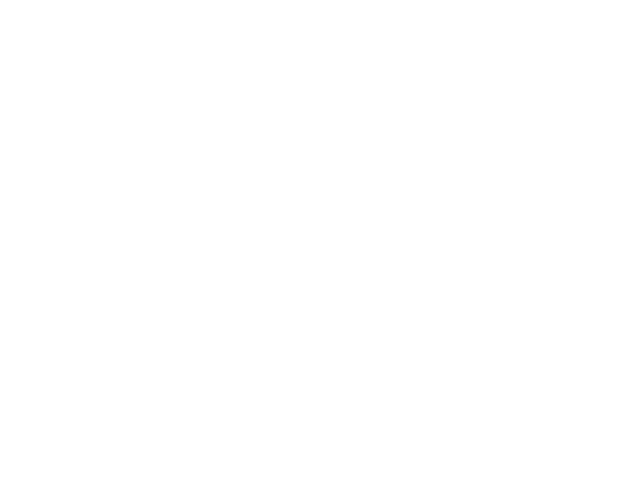

In [49]:
%matplotlib notebook
limit = 43
plt.plot([calc_teo6_expr4(n).evalf() for n in range(2, limit) if (((-1)**n)*T(-n-1)).evalf()>0], 'g')
plt.plot([calc_teo6_expr3(n).evalf() for n in range(2, limit) if (((-1)**n)*T(-n-1)).evalf()>0])
plt.show()

Inizialmente la relazione è vera, poi crescendo con $n$ lo scarto tra le due parti della disuguaglianza è sempre più piccolo, fino ad azzerarsi. Questo è dovuto alla limitata precisione con i float.

Proseguendo con la dimostrazione otteniamo quindi:
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} < \frac{1}{(-1)^n(T_n+T_{n-1})}$$

In [50]:
calc_teo6_expr5 = Lambda([n], Sum(((-1)**k)/(T(k)), (k,n,oo)))
calc_teo6_expr6 = Lambda([n], 1/((-1)**n * (T(n)+T(n-1))))
[(n, calc_teo6_expr5(n).evalf() < calc_teo6_expr6(n).evalf()) for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()>0  ]

<IPython.core.display.Javascript object>


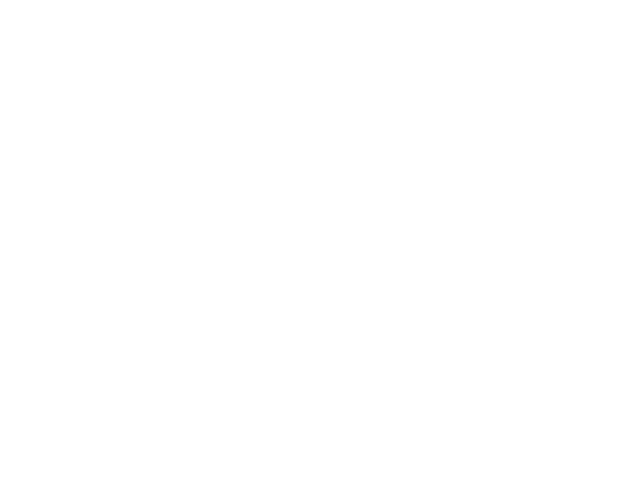

In [51]:
%matplotlib notebook
test_case = 38
limit =50
calc_teo6_expr5_bis = Lambda([n, N], Sum(((-1)**k)/(T(k)), (k,n,N)))  
plt.plot([calc_teo6_expr6(test_case).evalf()]*limit, 'g')
plt.plot([calc_teo6_expr5_bis(test_case, test_case+N).evalf() for N in range(0, limit)])
plt.show()

Il secondo caso, ovvero quello in cui $(-1)^nT_{-(n+1)} < 0$ è mostrato di seguito:
$$\sum_{k=n}^{\infty} \frac{(-1)^k}{T_k} > \frac{1}{(-1)^n(T_n+T_{n-1})}$$

In [52]:
[(n, calc_teo6_expr5(n).evalf() > calc_teo6_expr6(n).evalf()) for n in range(2, 50) if (((-1)**n)*T(-n-1)).evalf()<0  ]

Usando il secondo risultato del Lemma 2 si ottiene il risultato finale:
$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{(-1)^k)}{T_k}\right)^{-1}\right\rfloor = 
\begin{cases}
(-1)^n (T_n + T_{n-1})\ \text{se}\ (-1)^n T_{-(n+1)} > 0 \\
(-1)^n (T_n + T_{n-1} -1)\ \text{se}\ (-1)^n T_{-(n+1)} < 0
\end{cases}$$
Su cui si effettua una verifica numerica:

In [53]:
teo6_expr7 = floor(Sum((-1)**k/T(k), (k,n,oo))**-1)
calc_teo6_expr7 = Lambda([n], teo6_expr7)
calc_teo6_expr8 = Lambda([n], ((-1)**n)*(T(n)+T(n-1)))
[(n, (calc_teo6_expr7(n).evalf() == calc_teo6_expr8(n).evalf()))  for n in range(2, 15) if (((-1)**n)*T(-n-1)).evalf()>0]


[(4, True), (5, True), (6, True), (10, True), (11, True), (12, True)]

In [54]:
calc_teo6_expr9 = Lambda([n], ((-1)**n)*(T(n)+T(n-1))-1)
[(n, (calc_teo6_expr7(n).evalf()==calc_teo6_expr9(n).evalf()))  for n in range(2, 15) if (((-1)**n)*T(-n-1)).evalf()<0]


[(2, True), (7, True), (8, True), (9, True), (13, True), (14, True)]

###### Teorema 7:


Sia $n \geq 4$ un intero positivo, allora:
$$\left\lfloor\left(\sum_{k=n}^{\infty} \frac{1}{\sum_{i = 1}^{k} T_i}\right)^{-1}\right\rfloor = T(n)-1$$


In [55]:
teo7_final_result = (Sum( 1 / (Sum(T(i), (i, 1, k))), (k,n,oo)))**-1
teo7_final_result_calc = Lambda([n], floor(teo7_final_result))
[(teo7_final_result_calc(n).evalf() == (T(n).evalf()-1)) for n in range(4,15)]

[True, True, True, True, True, True, True, True, True, True, True]

Dimostrazione:

Usando il secondo punto del Lemma 1 possiamo scrivere questo.
$$\frac{1}{T_n} < \sum_{k=n}^{\infty}\frac{2}{T_{k+2}+T_k-1} < \frac{1}{T_n-1}\qquad n\geq4 $$
Consideriamo ora $$\left(\frac{1}{T_n-1} - \frac{2}{T_{n+2}+T_{n}-1} - \frac{1}{T_{n+1}+1}\right) > 0$$
Quindi abbiamo:
$$\frac{2}{T_{n+2}+T_{n}-1} < \frac{1}{T_n-1} -\frac{1}{T_{n+1}+1} $$
Verifichiamo:

In [56]:
teo7_expr1 = 2/(T(n+2)+T(n)-1)
calc_teo7_expr1 = Lambda([n],teo7_expr1)
calc_teo7_expr2 = Lambda([n],1/(T(n)-1) - 1/T(n+1))
[(n, calc_teo7_expr1(n).evalf() < calc_teo7_expr2(n).evalf()) for n in range(4, 50)]

Perciò abbiamo:
$$\sum_{k=n}^{\infty}\frac{2}{T_{k+2}+T_k-1} < \frac{1}{T_n-1} $$

In [57]:
calc_teo7_expr3 = Lambda([n],Sum(calc_teo7_expr1(k),(k,n,oo)))
calc_teo7_expr4 = Lambda([n], 1/(T(n)-1))

[(n, calc_teo7_expr3(n).doit().evalf() < calc_teo7_expr4(n).evalf()) for n in range(4,50)]

Però avremo anche che:
$$\frac{1}{T_n} - \frac{2}{T_{n+2} + T_{n} -1 } - \frac{1}{T_{n+1}} < 0 \qquad n\geq 4$$
Da cui deriva:
$$\sum_{k=n}^{\infty}\frac{2}{T_{k+2} + T_{k} -1 } > \frac{1}{T_n} $$

In [58]:
[(n, calc_teo7_expr3(n).doit().evalf() > (T(n)**-1).evalf()) for n in range(4,40)]


<IPython.core.display.Javascript object>


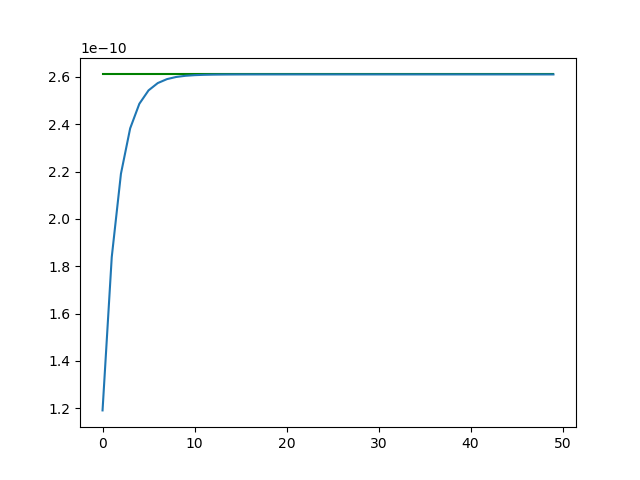

In [59]:
%matplotlib notebook
test_case = 38
limit =50
calc_teo7_expr3_bis = Lambda([n,N],Sum(calc_teo7_expr1(k),(k,n,N)))
plt.plot([(T(test_case)**-1).evalf()]*limit, 'g')
plt.plot([calc_teo7_expr3_bis(test_case, test_case+N).evalf() for N in range(0, limit)])
plt.show()